In [134]:
options(repr.plot.width=7, repr.plot.height=3)
library(tidyverse)
library(ggplot2)
library(RSQLite)

# connect to the sqlite file
con = dbConnect(SQLite(), dbname="../data/database.sqlite")# get a list of all tables
alltables = dbListTables(con)
# get the populationtable as a data.frame
df_reviews = dbGetQuery( con,'SELECT * FROM reviews' )
df_genres = dbGetQuery( con,'SELECT * FROM genres' )
# Close connection
dbDisconnect(con)           

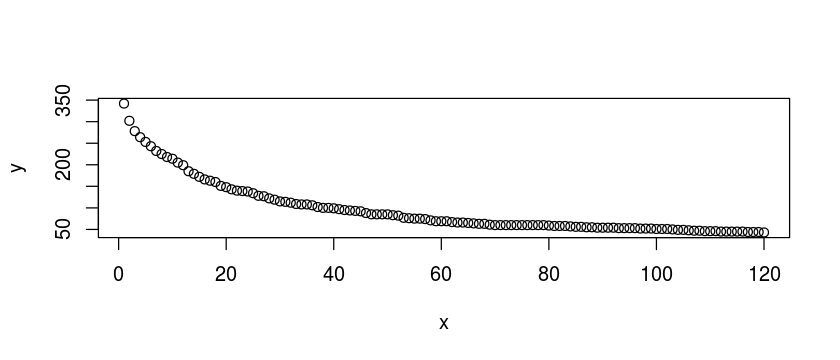

In [135]:
df_reviews %>%
    group_by(author) %>%
    summarise(n = n()) -> authors_count

x = seq(120)
y = 0
for (i in x){
    y[i] = sum(authors_count$n > i)}

plot(x,y)

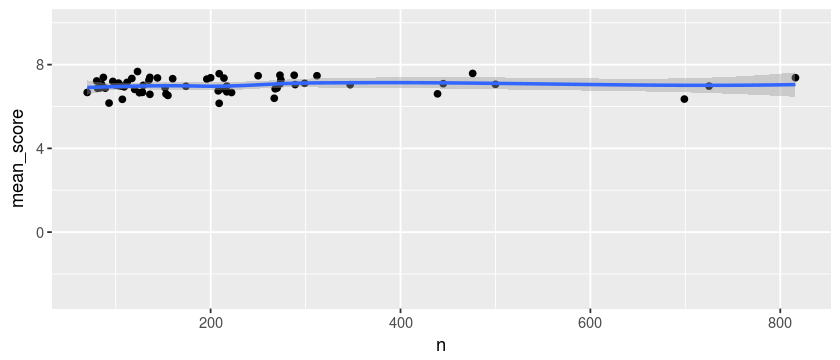

In [136]:
df_reviews %>%
    group_by(author) %>%
    mutate(n = n()) %>%
    filter(n >= 70) %>%
    group_by(author) %>%
    summarise(n = n(),mean_score = mean(score), sd_score = sd(score)) %>%
    ggplot(aes(n, mean_score)) + 
    geom_point() +
    scale_y_continuous(limits = c(-3, 10)) +
    geom_smooth(method = 'loess', se = T)

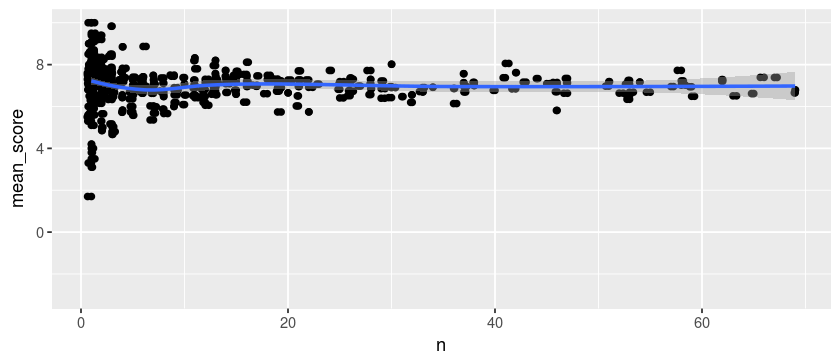

In [138]:
df_reviews %>%
    group_by(author) %>%
    mutate(n = n()) %>%
    filter(n < 70) %>%
    group_by(author) %>%
    summarise(n = n(),mean_score = mean(score), sd_score = sd(score)) %>%
    ggplot(aes(n, mean_score)) + 
    geom_point() +
    scale_y_continuous(limits = c(-3, 10)) +
    geom_jitter() +
    geom_smooth(method = 'loess', se = T)